In [139]:
import numpy as np
import matplotlib.pyplot as plt

In [140]:
energies = np.load("output/energies.npy")
H = np.load("output/hamiltonian.npy")
gamma_L = np.load("output/gamma_L.npy")
gamma_R = np.load("output/gamma_R.npy")
sigma_D = np.load("output/ed/self_energy.npy")

In [141]:
print("Hamiltonian:\n", H)
eigvals, eigvecs = np.linalg.eig(H)
print("Eigenvalues:", eigvals)

Hamiltonian:
 [[-0.5   0.5   0.  ]
 [ 0.5   0.25  0.5 ]
 [ 0.    0.5   0.5 ]]
Eigenvalues: [-0.7938861   0.08183183  0.96205427]


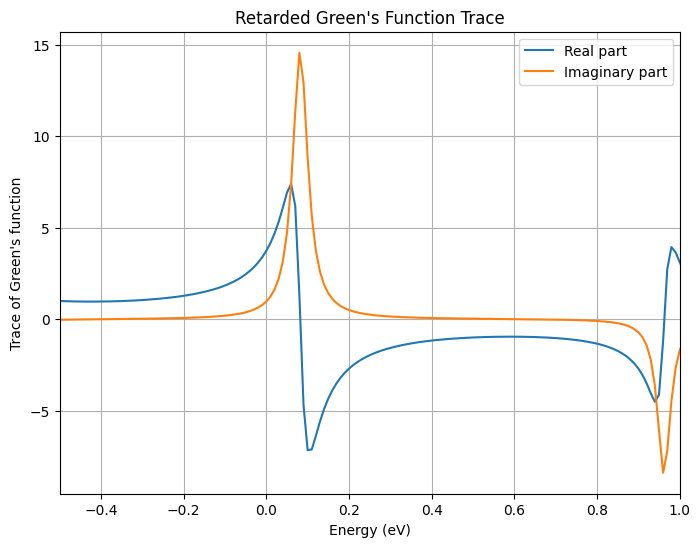

In [142]:
data = np.load("output/dft/G_retarded.npz")
E_G = data["energies"]
G = data["G"]  # shape: (nE, n, n) complex
idx_l, idx_r = 0, 2
G_lr = G[:,idx_l,idx_r]

plt.figure(figsize=(8, 6))
plt.plot(E_G, G_lr.real, label="Real part")
plt.plot(E_G, G_lr.imag, label="Imaginary part")
plt.xlabel("Energy (eV)")
plt.ylabel("Trace of Green's function")
plt.title("Retarded Green's Function Trace")
plt.xlim(-0.5,1.0)
plt.legend()
plt.grid()
plt.show()

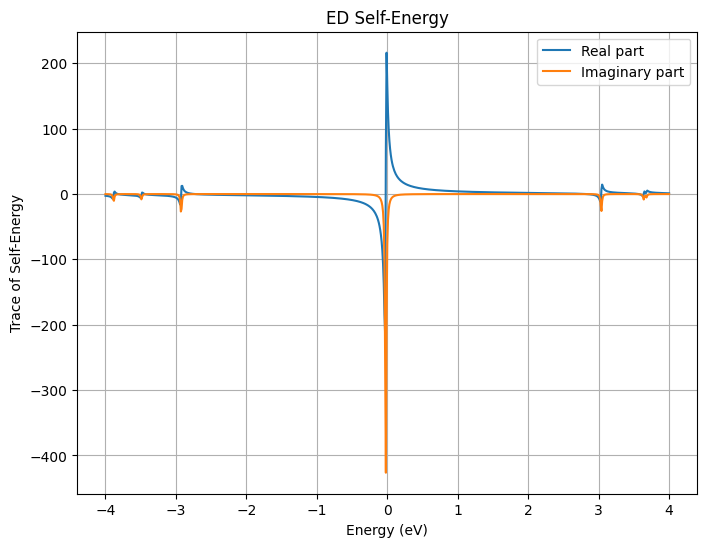

In [143]:
energies = np.load("output/energies.npy")
se = np.load("output/ed/self_energy.npy")
se_trace = np.trace(se, axis1=1, axis2=2)
plt.figure(figsize=(8, 6))
plt.plot(energies,se_trace.real, label="Real part")
plt.plot(energies,se_trace.imag, label="Imaginary part")
plt.xlabel("Energy (eV)")
plt.ylabel("Trace of Self-Energy")
plt.title("ED Self-Energy")
plt.legend()
plt.grid()
# plt.xlim(-1.0, 1.23)
plt.show()

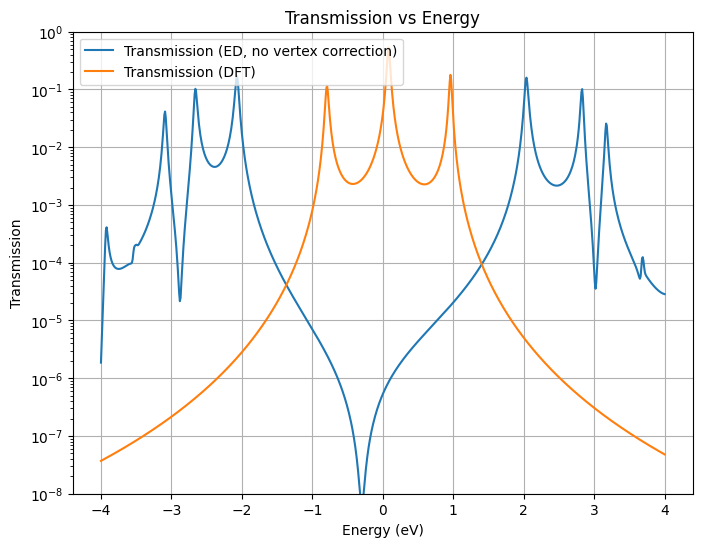

In [157]:
E, Tel, _, _ = np.load("output/ed/no_vertex/ET.npy")
E_dft, T_dft = np.load("output/dft/ET.npy")
plt.figure(figsize=(8, 6))
plt.plot(E, Tel, label="Transmission (ED, no vertex correction)")
plt.plot(E_dft, T_dft, label="Transmission (DFT)")
plt.xlabel("Energy (eV)")
plt.ylabel("Transmission")
plt.title("Transmission vs Energy")
plt.legend()
plt.grid()
plt.ylim(1e-8, 1.0)
plt.yscale("log")

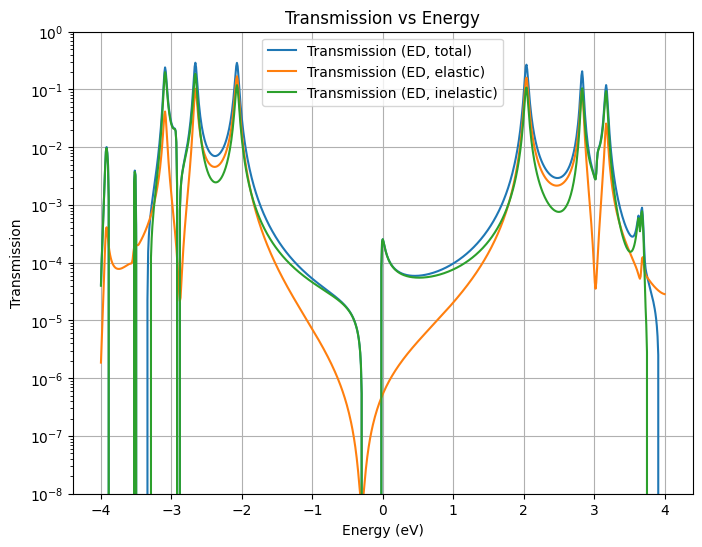

In [145]:
E, Tel, Tin_ferretti, T_ferretti = np.load("output/ed/ferretti/ET.npy")
plt.figure(figsize=(8, 6))
plt.plot(E, T_ferretti, label="Transmission (ED, total)")
plt.plot(E, Tel, label="Transmission (ED, elastic)")
plt.plot(E, Tin_ferretti, label="Transmission (ED, inelastic)")
plt.xlabel("Energy (eV)")
plt.ylabel("Transmission")
plt.title("Transmission vs Energy")
plt.legend()
plt.grid()
plt.ylim(1e-8, 1.0)
plt.yscale("log")

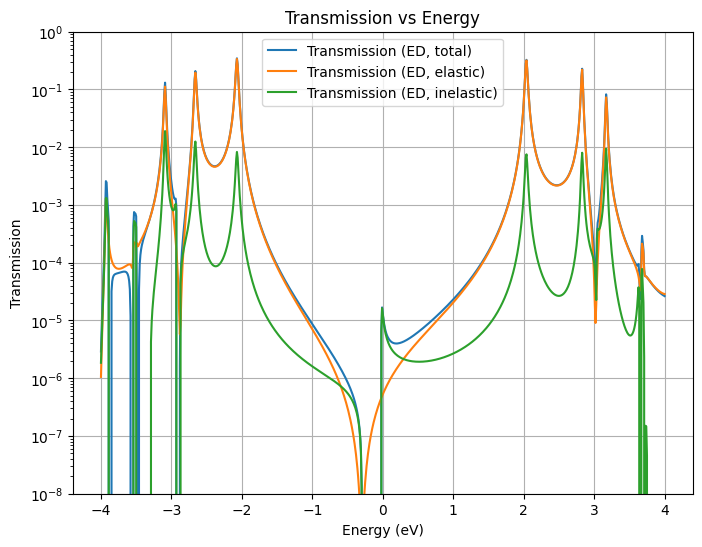

In [146]:
E, Tel, Tin_brazilian, T_brazilian = np.load("output/ed/brazilian/ET.npy")
plt.figure(figsize=(8, 6))
plt.plot(E, T_brazilian, label="Transmission (ED, total)")
plt.plot(E, Tel, label="Transmission (ED, elastic)")
plt.plot(E, Tin_brazilian, label="Transmission (ED, inelastic)")
plt.xlabel("Energy (eV)")
plt.ylabel("Transmission")
plt.title("Transmission vs Energy")
plt.legend()
plt.grid()
plt.ylim(1e-8, 1.0)
plt.yscale("log")

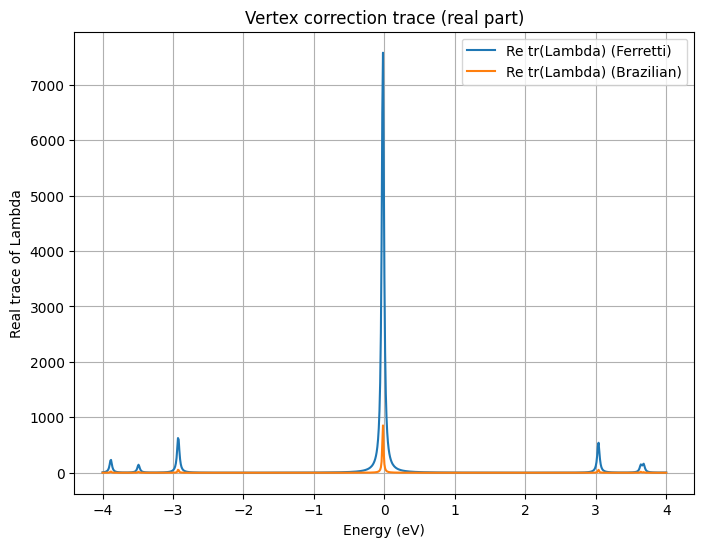

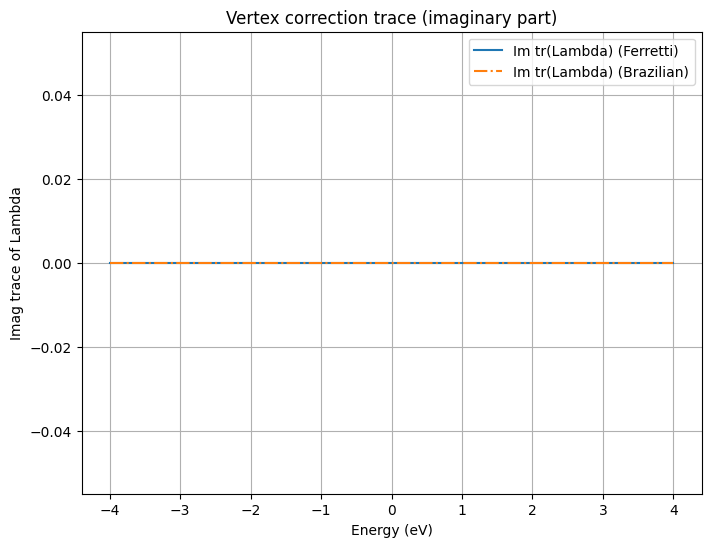

In [147]:
from pathlib import Path


def load_lambda_trace(folder: str):
    """Load energies and trace(Lambda) from a workflow output folder."""
    p = Path(folder) / "vertex_correction.npz"
    if not p.exists():
        print(f"Missing vertex correction file: {p}")
        return None
    d = np.load(p)
    E = d["energies"]
    tr = d["trace"]
    return E, tr


data_ferretti = load_lambda_trace("output/ed/ferretti")
data_brazilian = load_lambda_trace("output/ed/brazilian")

plt.figure(figsize=(8, 6))
if data_ferretti is not None:
    E_f, tr_f = data_ferretti
    plt.plot(E_f, tr_f.real, label="Re tr(Lambda) (Ferretti)")
if data_brazilian is not None:
    E_b, tr_b = data_brazilian
    plt.plot(E_b, tr_b.real, label="Re tr(Lambda) (Brazilian)")
plt.xlabel("Energy (eV)")
plt.ylabel("Real trace of Lambda")
plt.title("Vertex correction trace (real part)")
plt.legend()
plt.grid()

plt.figure(figsize=(8, 6))
if data_ferretti is not None:
    plt.plot(E_f, tr_f.imag, label="Im tr(Lambda) (Ferretti)")
if data_brazilian is not None:
    plt.plot(E_b, tr_b.imag, '-.', label="Im tr(Lambda) (Brazilian)")
plt.xlabel("Energy (eV)")
plt.ylabel("Imag trace of Lambda")
plt.title("Vertex correction trace (imaginary part)")
plt.legend()
plt.grid()

In [151]:
# Replace all negative values in Tin_ferretti and Tin_brazilian with 1e-8

Tin_ferretti[Tin_ferretti < 0] = 1e-8
Tin_brazilian[Tin_brazilian < 0] = 1e-8

T_ferretti = Tel + Tin_ferretti
T_brazilian = Tel + Tin_brazilian

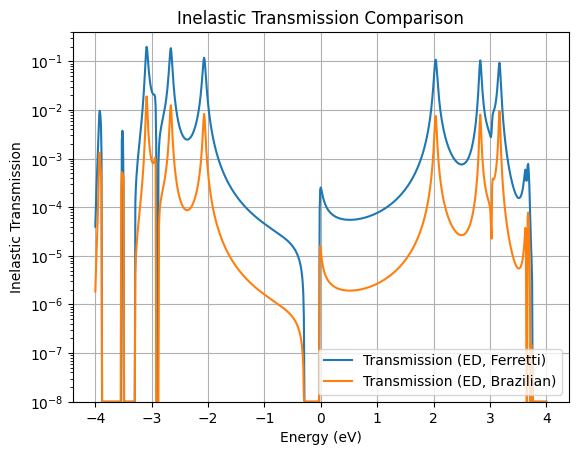

In [152]:
plt.plot(E, Tin_ferretti, label="Transmission (ED, Ferretti)")
plt.plot(E, Tin_brazilian, label="Transmission (ED, Brazilian)")
plt.xlabel("Energy (eV)")
plt.ylabel("Inelastic Transmission")
plt.title("Inelastic Transmission Comparison")
plt.legend()
plt.grid()
plt.ylim(1e-8, 0.4)
plt.yscale("log")

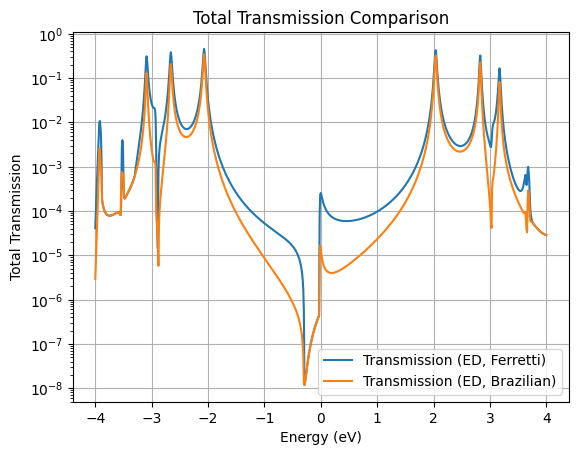

In [154]:
plt.plot(E, T_ferretti, label="Transmission (ED, Ferretti)")
plt.plot(E, T_brazilian, label="Transmission (ED, Brazilian)")
plt.xlabel("Energy (eV)")
plt.ylabel("Total Transmission")
plt.title("Total Transmission Comparison")
plt.legend()
plt.grid()
# plt.ylim(1e-5, 0.4)
plt.yscale("log")